# Aims of this tutorial
The aim of this tutorial is to illustrate how Perceptrons can be combined into Neural Networks to solve problems that are not linearly separable, such as XOR.  
We will look at the key differences between the two algorithms and also consider how network architecture and training parameters affects the outcome.

## Learning Objectives:
1. Understand the key differences between the Neural Network and Perceptron algorithms:
- Non-linear activation functions.
- Using Backpropagation to update (learn) the weights.
2. Understand how different nodes learn different aspects of the problem.

3. Consider the need for different network architectures and learning parameters for different problems.

### Overview:
<img src="ANN-2-Node.png" style="float:right">

As we have seen, Perceptrons are only capable of solving linearly separable problems.   
To overcome this limitation, we can connect Perceptrons together into a network.  
Each one becomes a Node in the network, and they are connected together into Layers. 

In standard Artificial Neural Network (ANN) architecture there is one input, one output and one or more hidden layers.  
- Though input layer is a bit misleading, it doesn't actually do any computation, it is just the inputs to the network.
- So, outputs of hidden layers become the inputs to subsequent hidden layers, or the final output layer. 
- Hidden nodes tend to learn different aspects of the problem space, building more complex decision boundaries and are therefore able to solve more complex problems.

Note: 
- The number of nodes in the input layer must equal the number of inputs/features in the data. 
- The number of output nodes must equal the number of labels/classes in the data. 
- The number of hidden layers and nodes in the layers is arbitrary, and selecting this architecture is part of building an ANN.

Neural Network - Algorithm  
Similar to Perceptrons, ANN are trained in two 'phases'. 
- The forward pass, where data is input into the network to produce an output. 
- The backward pass, where the error in output is used to update the weights using Backpropagation and Gradient Descent.


<img src="ann-pseudocode.png" style="float:right">

## Activity 1:Solving XOR
As an introduction to the ANN algorithm, and to give you an intuition for how different nodes and layers in the network learn different aspects of the problem space, we are going to look at how a small network can solve the XOR problem.
You can open the environment by following the link:
https://mybinder.org/v2/gh/NathanDuran/IAI-ML-Notebooks/master?filepath=ann_xor.ipynb
The notebook will guide you through the neural network algorithm and the key differences from Perceptrons, activation functions and Backpropagation.
Running the code will train an ANN to solve the XOR problem and produces a visualisation to show how different nodes have learned different aspects of the problem to create a more complex decision boundary (in this case different logical functions.

You do not need to understand how the graphs/visualisations are produced.

You should try and understand what the graphs/visualisations output means.

### Activity is to run MLP with one hidden layer and see (through experimentation) how many nodes are needed to relaiably solve x-or

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import numpy as np
from random import random
%matplotlib inline



In [2]:
def plotDecisionSurface(model,X,y):
    min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1 #1st feature
    min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1 #2nd feature
    x1_scale = np.arange(min1, max1, 0.1)
    x2_scale = np.arange(min2, max2, 0.1)
    x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)
    # flatten each grid to a vector
    x_g, y_g = x_grid.flatten(), y_grid.flatten()
    x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))
    # stack to produce hi-res grid in form like dataset
    grid = np.hstack((x_g, y_g))

    # make predictions for the grid
    y_pred_2 = myMLP.predict(grid)
    
    #predict the probability
    p_pred = myMLP.predict_proba(grid)
    # keep just the probabilities for class 0
    p_pred = p_pred[:, 0]
    # reshaping the results
    p_pred.shape
    pp_grid = p_pred.reshape(x_grid.shape)

    # plot the grid of x, y and z values as a surface
    levels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    surface = plt.contourf(x_grid, y_grid, pp_grid, levels,cmap='Pastel1')
    plt.colorbar(surface)
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Pastel1')
    # show the plot
    
    
#    levels = [-1.5, -1, -0.5, 0, 0.5, 1]
#CS3 = ax2.contourf(X, Y, Z, levels,
#                   colors=('r', 'g', 'b'),
#                   origin=origin,
#                   extend='both')

Training set score: 1.000000


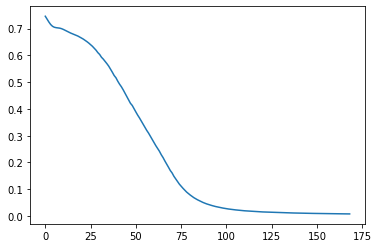

In [3]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

train_X = np.array( [[0,0],[0,1],[1,0],[1,1]])

xor_y = np.array([0,1,1,0])
or_y=np.array([0,1,1,1])
train_y= xor_y
# one hidden layer with 10 neurons logistic (sigmoid) activation and Stochastic Gradient Descent (backprop)

myMLP =  MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=0, random_state=1,
                    learning_rate_init=.1)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
#with warnings.catch_warnings():
#    warnings.filterwarnings("ignore", category=ConvergenceWarning,
#                            module="sklearn")
#    myMLP.fit(train_X, train_y)

myMLP.fit(train_X, train_y)
    
lossplot=plt.plot(myMLP.loss_curve_)    
print("Training set score: %f" % myMLP.score(train_X, train_y))

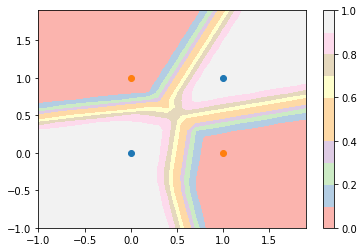

In [4]:
plotDecisionSurface(myMLP,train_X,train_y)

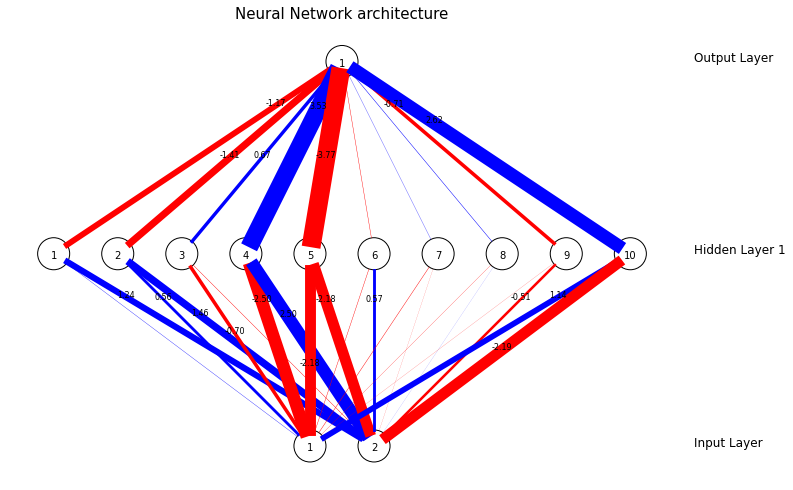

In [6]:
import VisualiseNN as VisNN

#network_structure = np.hstack(([train_X.shape[1]], np.asarray(myMLP.hidden_layer_sizes), [train_y.shape[0]]))
network_structure = np.hstack((2, np.asarray(myMLP.hidden_layer_sizes), 1))
# Draw the Neural Network with weights
network=VisNN.DrawNN(network_structure, myMLP.coefs_)
network.draw()


## Activity2: MLP for multiclass problems:  iris data

- introduce idea of parallel classifier using softmax and one-hot encoding
  - benefit that the classifiers can all share the feature creation done in prrevious layers
- same visualisations as first case 


<div class="alert alert-block alert-danger">
TODO change to the  code from lectures and change  progression:
    <ol> 
    <li>How many nodes to you need to reliably solve XOR MCQ: how much variability so you see?</li>
    <li> Iris data as simple multiclass -softmax and onehot encoding, train and test </li>
    <li> MNIST - changing meta-parameters (width and number of hidden layers), learning rate, number of epochs </li>
    <li> Discuss: does low training error always mean low test error: <b>mentimeter to mediate?</b> </li>
    </ol></div>


## Activity3: Solving MNIST

## TO DO - tidy up, show ten classes in in parallel,  
### activitiy is finding out how many layers, and how wide, are needed for this more complex task


The aim of this activity is to give you some experience selecting the training parameters and network architecture for applying neural networks to a classification task.
We will look at the Wheat Seeds Dataset which the prediction of species given measurements of seeds from different varieties of wheat. It is a 3-class classification problem. The number of examples for each class is balanced and there are 210 examples with 7 feature variables.
The data is being processed in a similar way as the Iris data, but you should see that it is much harder to separate the different classes of wheat seeds.
You need to complete the code for creating and training and testing the network for the wheat seed data which includes:
Selecting training parameters (learning rate and epochs).
Defining network architecture (number of input, hidden and output nodes).
Creating the network using the code provided and recording training and test outputs.
You will probably find that it is a little harder to get high accuracy on this data.
What effect does changing the learning rate and number of epochs have?
What effect does changing the number of hidden nodes have?
Crucially, does good training accuracy always mean better test accuracy?

 

Neural Network (MLP) Visualization for Digit Recognition
loosely based on example visualisation code from a Kaggle example and "towards data science"
This notebook contrasts how simple Multi-layer Perceptron (MLP) Neural Networks and Convolutional Neural Networks recognize hand-written digits from the MNIST data set.
A two-layer MLP does a decent job at recognizing hand-written digits.
A very simple convolutional model does even better (though still not close to the 'state of the art')
There is considerable difference in the interpretability of the features

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
from keras import backend as K




In [ ]:
#exanmple code from https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


In [ ]:
# load mnist dataset
data = pd.read_csv('mnist_train.csv')

#next few lines added by jim to estiamte vanialla cnn performance
x_train = data.iloc[:,1:785]
y_train = data.iloc[:,0]

testdata = pd.read_csv('mnist_test.csv')
x_test = testdata.iloc[:,1:785]
y_test = testdata.iloc[:,0]


#data = data.head(30000)
# split data into train and test sample
#x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:785], data.iloc[:,0],  
                                                    #test_size = 0.1, random_state = 42)

dataSamples = data.shape[0]
trnum = dataSamples#trnum = int(dataSamples*0.9)
tenum = testdata.shape[0]#tenum= dataSamples-trnum
x_train = x_train.values.reshape(trnum, 784)
x_test = x_test.values.reshape(tenum, 784)

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

X_train_img = x_train.reshape(x_train.shape[0],28,28,1)
X_test_img = x_test.reshape(x_test.shape[0],28,28,1)



f, axes = plt.subplots(2, 10, sharey=True,figsize=(20,5))
for i,ax in enumerate(axes.flat):
    ax.axis('off')
    ax.imshow(X_test_img[i,:,:,0],cmap="gray")

Specifying and Training a simple Neural Network

<img align="right" src="simple_MLP_for_Mnist.png" alt="Architecture of simple MLP, only 28 inputs shown" width="400"/>

We use a simple two-layer MLP with sigmoid activation Architecture of simple MLP, only 28 inputs shown
In the first hidden layer, each neuron takes every pixel value as input parameter.
Every neuron in the second hidden layer then takes all the outputs of the first layer (after activation using sigmoid) as input parameters. * After applying a softmax activation, these results form the final output layer.
The optimizer then derives linear weights in such a way as to minimize the loss function (in this case the categorical crossentropy) and thus maximizing the accuracy of the classification.

In [ ]:
# network parameters
input_size = x_train.shape[1]
batch_size = 64
activation = 'sigmoid'
# this model is a 3-layer MLP with sigmoid activation each layer
model = Sequential()
model.add(Dense(25, input_dim=input_size, activation='sigmoid'))
model.add(Dense(25,activation='sigmoid'))
model.add(Dense(num_labels,activation='softmax'))
model.summary()

# loss function for one-hot vector using adam optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Slide Type
This model implementation reaches an accuracy of ~96% if we give it the whole training set, which is remarkable, but better results are possible using, e.g., a Convolutional Neural Network. We use the simpler MLP to make the interpretation of the visualization results easier.

In [ ]:
Extract Output and Group Information
We extract the outputs generated by each individual neuron and for each frame in the MNIST training sample and store them on a per-layer basis.

In [ ]:
get_layer_output = K.function([model.layers[0].input, model.layers[0].input, model.layers[0].input],
                              [model.layers[0].output, model.layers[1].output, model.layers[2].output])

layer1_output, layer2_output, layer3_output = get_layer_output([x_train])

Finally, we extract and store the indices of frames showing the same digit.

In [ ]:
train_ids = [np.arange(len(y_train))[y_train[:,i] == 1] for i in range(10)]

Visualization of Individual Frames
In this visualization, we focus on individual training data (i.e., individual frames with hand-written digits).
The following panel shows from left to right
the original 28x28 pixel frame depicting a hand-written figure,
the output values of all neurons of the first hidden layer,
the output values of all neurons of the second hidden layer, and
the one-hot encoded output layer indicating the model classification result.
Note that in those plots showing network layers, each pixel stands for the output of a single neuron. This output is based on the input parameters passed on from the previous layer, the trained weights for each neuron, and the activation function used in this layer. Dark blue pixels stand for low output values, while yellow pixels stand for high output values. The pixels have been arranged in two dimensions to save space; just think of these layers in linear arrangements to stay in the typical picture of layers in a network.

In [ ]:
%%capture
%matplotlib inline

# digit to be plotted
digit = 6

# indices of frames to be plotted for this digit
n = range(50)

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
    
ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)   

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)    
        
def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(x_train[train_ids[digit][id]].reshape((28,28)), animated=True)
    layer1_plot = ax2.imshow(layer1_output[train_ids[digit][id]].reshape((5,5)), animated=True)
    layer2_plot = ax3.imshow(layer2_output[train_ids[digit][id]].reshape((5,5)), animated=True)
    output_plot = ax4.imshow(np.append(layer3_output[train_ids[digit][id]], 
                                       [np.nan, np.nan]).reshape((3,4)), animated=True)
    return digit_plot, layer1_plot, layer2_plot, output_plot,

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [ ]:
ani

In [ ]:
Scrolling through the animation, it becomes clear that in most cases the same subset of neurons fires, while other neurons remain quiescent. This is much more obvious in the second hidden layer than in the first hidden layer and can be interpreted as the first layer pre-processesing the pixel data, while the second layer deals with pattern recognition. Note that in most cases the recognition of the digit shown is unambiguous; ambiguity only occurs in somewhat pathologic cases.
You can change the digit shown by changing the digit value in the code block above.

Conclusions
Despite variations in the shapes of hand-written digits, the same groups of neurons is involved in the identification of the same digits.
Similarities in the shapes of digits translate into similarities in the groups of neurons that are involved in their identification in the first hidden layer, but not so much in the second hidden layer.